
# 👋 Clustering Tutorial with  PyCaret

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.


Reza Rezazadegan   
[dreamintelligent.com](dreamintelligent.com)


In [5]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

Clustering is the unsupervised task of grouping data points by similarity. In other words, in clustering we want to put our data points into clusters (groups) 
$$C_1, C_2, \ldots, C_k$$
in such a way that the points inside each cluster are similar to each other but points in different clusters are dissimilar.  
In clustering, usually distance (e.g. Euclidean distance) is used to quantify dissimilarity. 

The applications of clustering include the following.

- Behavioral Customer segmentation: you can cluster your customers according to their purchasing data and then make offers and recommendations to them accordingly.
- Data Analysis: clustering the data first and analyzing the clusters separately is often easier than studying the whole dataset.
- Outlier detection: clustering can reveal which datapoints are outliers, i.e. do not belong to any major cluster.
- Dimensionality reduction: after clustering, we can replace a sample’s feature vector with the vector of its affinities to the clusters.
- Image-based search: clustering a database of images first, we can see to which cluster a new image belongs.
- Color quantization: reducing the number of colors in an image by clustering the pixel colors in it. Each color is regarded as a point in
the 3-dimensional RGB space. We then replace each color with the mean of the cluster it belongs to. Used in image compression and
image segmentation.


PyCaret's Clustering Module is an unsupervised machine learning module that performs the task of grouping a set of objects in such a way that objects in the same group (also known as a cluster) are more similar to each other than to those in other groups. It has over 10 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret's unsupervised module consist of following 6 steps in this order:

### **Setup** ➡️ **Create Model** ➡️ **Assign Labels** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [32]:

from pandas import read_csv
data= read_csv("digits.csv", header=None) # The CSV file does not have a header
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5
10988,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4
10989,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5
10990,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has one required parameter i.e. `data`. All the other parameters are optional.

In [33]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(10992, 17)"
2,Transformed data shape,"(10992, 17)"
3,Numeric features,17
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


## Create Model

The clustering module does not have a `compare_models` function and we have to create the models separately. 

The `create_model` function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the `get_metrics` function. Custom metrics can be added or removed using the `add_metric` and `remove_metric` function. 

In [ ]:
# train kmeans model, with the number of clusters set to 10.
# We tell the model that the column 16 is the true label of the points
kmeans = create_model('kmeans', num_clusters=10, ground_truth="16")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3115,2718.7451,1.2614,0.6504,0.5117,0.6881


In [53]:
agg = create_model('meanshift', num_clusters=10, ground_truth="16")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0.0000,0.0000,1.0000


In [51]:
create_model?

Signature:
create_model(
    model: Union[str, Any],
    num_clusters: int = 4,
    ground_truth: Optional[str] = None,
    round: int = 4,
    fit_kwargs: Optional[dict] = None,
    verbose: bool = True,
    experiment_custom_tags: Optional[Dict[str, Any]] = None,
    engine: Optional[str] = None,
    **kwargs,
)
Docstring:
This function trains and evaluates the performance of a given model.
Metrics evaluated can be accessed using the ``get_metrics`` function.
Custom metrics can be added or removed using the ``add_metric`` and
``remove_metric`` function. All the available models can be accessed
using the ``models`` function.


Example
-------
>>> from pycaret.datasets import get_data
>>> jewellery = get_data('jewellery')
>>> from pycaret.clustering import *
>>> exp_name = setup(data = jewellery)
>>> kmeans = create_model('kmeans')


model: str or scikit-learn compatible object
    ID of an model available in the model library or pass an untrained
    model object consistent with sciki

In [16]:
# All the available models can be accessed using the `models` function.
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [12]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x000002B2C2A8E520>,"make_scorer(silhouette_score, response_method=...",pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x000002B...,"make_scorer(calinski_harabasz_score, response_...",pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x000002B2C2...,"make_scorer(davies_bouldin_score, response_met...",pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x000002B2C292F...,"make_scorer(homogeneity_score, response_method...",pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x000002B2C29...,"make_scorer(adjusted_rand_score, response_meth...",pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x000002B2C292...,"make_scorer(completeness_score, response_metho...",pred,{},True,True,False


# Description of some of the most widely used clustering models

## Kmeans
One of the most widely used clustering algorithms. It tries to cluster the data in such a way that the sum of the distances between points _in different clusters_ is maximized. In this method, we must specify the number $k$ of clusters in advance.   
At first, $k$ random data points $x_1, x_2, \ldots, x_k$ are chosen. Each data point that is closest to, say $x_i$ is assigned to the same cluster as $x_i$, which we denote by $C_i$. Then the _centroids_ (means) $m_1, m_2, \ldots, m_k$ of the clusters are computed. 
Then, in the next iteration, for each $m_i$ we consider a (new) cluster, and the data points are assigned based on which $m_i$ they are closet to. This process is repeated untill the clusters are not changed anymore.    


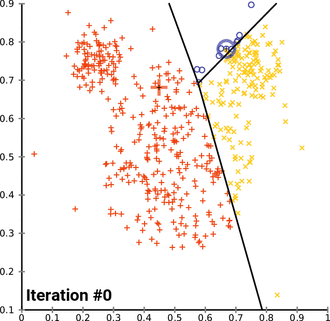

It is _not_ suitable if the intended clusters are not spherical in shape.

## Agglomerative
In **Agglomerative Clustering** we start by assuming that each data point is a cluster of its own then start merging them according a similarity criterior, untill all the points are merged into a single cluster. In this method, we consider a threshold $\epsilon$, whose value starts from 0 and then is increased. As $\epsilon$ is increased, any two clusters whose distance is less than or equal $\epsilon$ are merged. But how can we define the distance $d(C,C')$ of two clusters? There are different methods:

- The minimum distance $\min_{x\in C, y\in C'} d(x,y)$. This is called _single linkage_.
- The maximum distance $\max_{x\in C, y\in C'} d(x,y)$. This is called _complete linkage_.
- The average distance $\frac{1}{|C||C'|} \sum_{x\in C, y\in C'} d(x,y)$. This is called _average linkage_. 

As the threshold increases, we obtain a hierarchy (called **dendrogram**) of how the points are merged. 

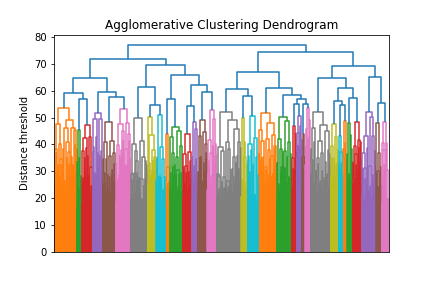



We thn need to choose a value for the threshold to _cut_ the dendrogram. 

## DBSCAN
It is a density-based clustering algorithm, which means each cluster must have enough density. 
It has two parameters $\epsilon, m$. Data points which have at least $m$ points in their $\epsilon$-neighborhood are called _core points_. 
A point in a cluster must be either a core point or in an $\epsilon$-neighborhood of a core point; otherwise it is considered _noise_. 

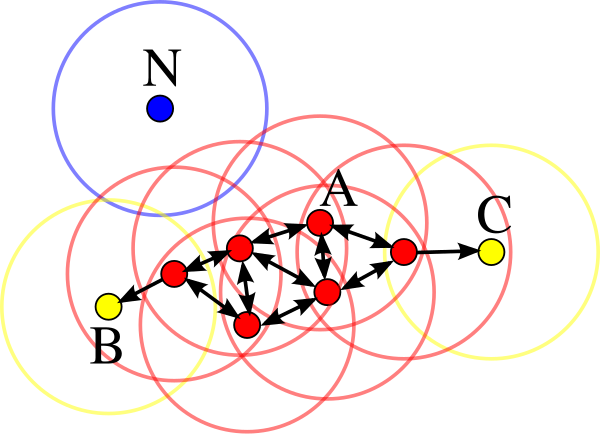

DBSCAN is a powerful clustering algorithm which can separate clusters whose boundaries are nonlinear. However it has a high computational cost. 

# Metrics for evaluating clusters

Just as in classification and regression, there are metrics for evaluating the clusters obtained from an algorithm.

## Silhouette coefficient
For a data point $x$, let
- $a$ be the average distance of $x$ to the points in its own cluster.
- $b$ the average distance of $x$ to the points in the nearest cluster.

Then the **silhouette score** of $x$ is $(b-a)/\max(a,b)$, which is a number between -1 and 1.  
The silhouette score of the whose data is the average of silhouette scores of all datapoints. 

A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

## Homogeneity Score and Completeness Score

- Homogeneity: each cluster contains only members of a single class.

- Completeness: all members of a given class are assigned to the same cluster.


In [54]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


## Assign Model
This function assigns cluster labels to the training data, given a trained model.

In [35]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Cluster
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8,Cluster 5
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8,Cluster 5
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8,Cluster 6
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9,Cluster 7
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9,Cluster 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,0,82,9,59,56,34,41,0,10,30,3,67,42,96,100,100,5,Cluster 5
10988,49,100,0,70,24,56,100,65,86,85,44,77,21,38,6,0,4,Cluster 7
10989,100,98,60,100,24,87,3,58,35,51,58,26,36,0,0,5,5,Cluster 7
10990,59,65,91,100,84,96,72,50,51,8,0,0,45,1,100,0,1,Cluster 2


<Axes: >

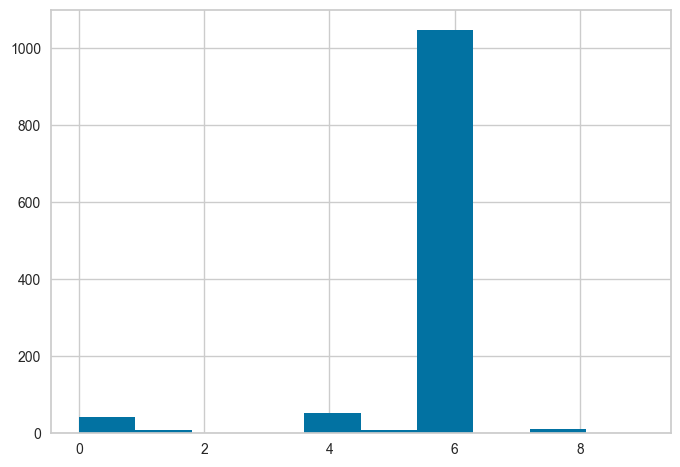

In [63]:
kmeans_cluster[kmeans_cluster.Cluster=='Cluster 0']["16"].hist(bins=10)

In [ ]:
# The average of the labels of the points in each cluster
kmeans_cluster.groupby("Cluster")["16"].agg('mean')

Cluster
Cluster 0    5.673191
Cluster 1    2.797210
Cluster 2    3.931929
Cluster 3    0.369527
Cluster 4    4.369755
Cluster 5    6.147894
Cluster 6    7.977324
Cluster 7    7.462025
Cluster 8    4.354968
Cluster 9    0.134301
Name: 16, dtype: float64

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [38]:
plot_model?

Signature:
plot_model(
    model,
    plot: str = 'cluster',
    feature: Optional[str] = None,
    label: bool = False,
    scale: float = 1,
    save: bool = False,
    display_format: Optional[str] = None,
) -> Optional[str]
Docstring:
This function analyzes the performance of a trained model.


Example
-------
>>> from pycaret.datasets import get_data
>>> jewellery = get_data('jewellery')
>>> from pycaret.clustering import *
>>> exp_name = setup(data = jewellery)
>>> kmeans = create_model('kmeans')
>>> plot_model(kmeans, plot = 'cluster')


model: scikit-learn compatible object
    Trained Model Object


plot: str, default = 'cluster'
    List of available plots (ID - Name):

    * 'cluster' - Cluster PCA Plot (2d)
    * 'tsne' - Cluster t-SNE (3d)
    * 'elbow' - Elbow Plot
    * 'silhouette' - Silhouette Plot
    * 'distance' - Distance Plot
    * 'distribution' - Distribution Plot


feature: str, default = None
    Feature to be evaluated when plot = 'distribution'. When ``plot`

## 2D PCA cluster plot

PCA is a linear diension reduction method which we use for visualizing data.

In [44]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster', label=True, feature="16")

## Elbow plot
It is used for decising the value of $k$ in Kmeans clustering. The $y$-axis is the within-cluster sum of square distances between points of each cluster. 


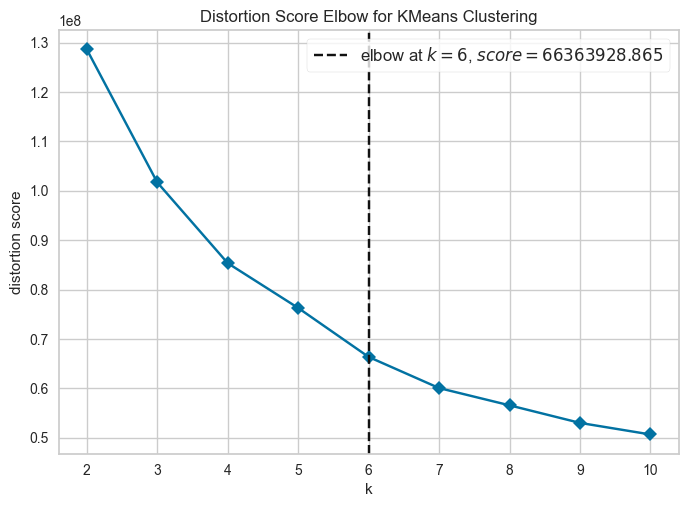

In [41]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

## Silhouette plot
It gives us the distribution of silhouette scores of the points in each cluster.

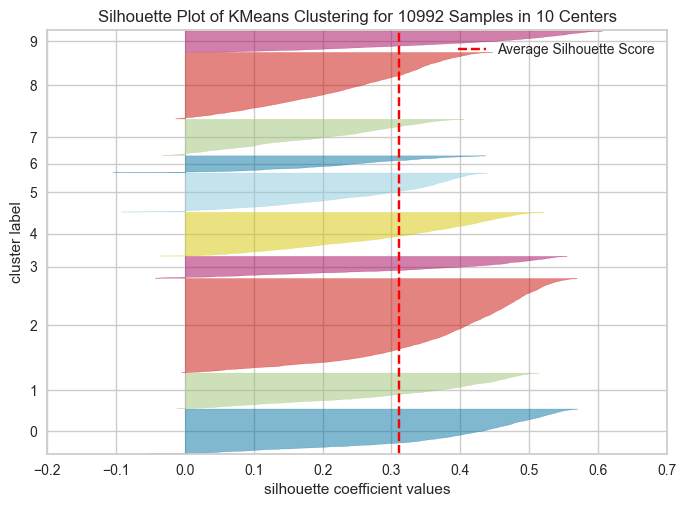

In [64]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [14]:
# check docstring to see available plots 
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [46]:
plot_model(kmeans, 'tsne', feature="16") #, label=True)

## Prediction
The `predict_model` function returns `Cluster` label as a new column in the input dataframe. This step may or may not be needed depending on the use-case. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using `assign_model` function. `predict_model` is only useful when you want to obtain cluster labels on unseen data (i.e. data that was not used during training the model).

In [16]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Age,Income,SpendingScore,Savings,Cluster
0,58.0,77769.0,0.791329,6559.829923,Cluster 2
1,59.0,81799.0,0.791082,5417.661426,Cluster 2
2,62.0,74751.0,0.702657,9258.992965,Cluster 2
3,59.0,74373.0,0.765680,7346.334504,Cluster 2
4,87.0,17760.0,0.348778,16869.507130,Cluster 0
...,...,...,...,...,...
500,28.0,101206.0,0.387441,14936.775389,Cluster 1
501,93.0,19934.0,0.203140,17969.693769,Cluster 0
502,90.0,35297.0,0.355149,16091.401954,Cluster 0
503,91.0,20681.0,0.354679,18401.088445,Cluster 0


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [47]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=10, random_state=123))]),
 'kmeans_pipeline.pkl')

In [48]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
#kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded
